# 3. Measuring Photometric Redshifts using EAZY for Cropped Region 1

In this step, we will measure photometric redshifts using EAZY software ([Brammer, van Dokkum & Coppi (2008)](https://ui.adsabs.harvard.edu/abs/2008ApJ...686.1503B/abstract)). The software is available for download from https://github.com/gbrammer/eazy-photoz. As the name suggests, this software is quite easy to use.

In [1]:
import os, sys
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

You can call EAZY from any directory. What you will need are the following 
* copy `templates` folder, FILTER.RES.latest, and FILTER.RES.latest.info files from the original EAZY directory into your working directory
* prepare a configuration file, and 
* make a new directory called `OUTPUT`. 
Please refer to EAZY documentation (http://www.astro.yale.edu/eazy/?doc) for more detailed information. Commonly, you will only need to change the following parts in the configuration file: `Filters`, `Input Files`, and `Output Files`. 

We have made two configuration files (zphot.param1 and zphot.param2) for this tutorial. zphot.param1 is intended for photo-z measurement of cropped region 1, while the zphot.param2 is for cropped region 2.

## 3.1. Run EAZY

EAZY is run via terminal commands. By using the `os` package in python, we can also execute terminal command in a python script. In this tutorial, we will be using this scheme.

In [2]:
dir_eazy = '/data/users/abdurrouf/softwares/eazy-photoz/src'  # change this depending on your EAZY directory 

#### run the photo-z calculation
os.system('%s/eazy -p zphot.param1' % dir_eazy)

EAZY, version 2015-05-08

Control files:
    param = zphot.param1
translate = zphot.translate
zeropoint = zphot.zeropoint

Reading in program parameters...

FILTERS_RES: FILTER.RES.latest
FILTER_FORMAT: 1
SMOOTH_FILTERS: n
SMOOTH_SIGMA: 100.000000
TEMPLATES_FILE: templates/eazy_v1.2_dusty.spectra.param
TEMPLATE_COMBOS: a
NMF_TOLERANCE: 0.000100
WAVELENGTH_FILE: templates/EAZY_v1.1_lines/lambda_v1.1.def
TEMP_ERR_FILE: templates/TEMPLATE_ERROR.eazy_v1.0
TEMP_ERR_A2: 0.500000
SYS_ERR: 0.000000
APPLY_IGM: y
LAF_FILE: templates/LAFcoeff.txt
DLA_FILE: templates/DLAcoeff.txt
SCALE_2175_BUMP: 0.000000
DUMP_TEMPLATE_CACHE: n
USE_TEMPLATE_CACHE: n
CACHE_FILE: photz1.tempfilt
CATALOG_FILE: ceers_eazy_input_crop1.cat
MAGNITUDES: n
NOT_OBS_THRESHOLD: -90.000000
N_MIN_COLORS: 5
OUTPUT_DIRECTORY: OUTPUT
MAIN_OUTPUT_FILE: photz1
PRINT_ERRORS: y
CHI2_SCALE: 1.000000
VERBOSE_LOG: y
OBS_SED_FILE: n
TEMP_SED_FILE: n
POFZ_FILE: n
BINARY_OUTPUT: y
APPLY_PRIOR: y
PRIOR_FILE: templates/prior_K_extend.dat
PRIO

Generating template grid >>

s_f140m
 355 -- jwst_niriss_f158m
 356 -- jwst_niriss_f277w
 357 -- jwst_niriss_f356w
 358 -- jwst_niriss_f444w
 359 -- jwst_niriss_f380m
 360 -- jwst_niriss_f430m
 361 -- jwst_niriss_f480m
 362 -- jwst_nircam_f070w
 363 -- jwst_nircam_f090w
 364 -- jwst_nircam_f115w
 365 -- jwst_nircam_f150w
 366 -- jwst_nircam_f200w
 367 -- jwst_nircam_f150w2
 368 -- jwst_nircam_f140m
 369 -- jwst_nircam_f162m
 370 -- jwst_nircam_f182m
 371 -- jwst_nircam_f210m
 372 -- jwst_nircam_f164n
 373 -- jwst_nircam_f187n
 374 -- jwst_nircam_f212n
 375 -- jwst_nircam_f277w
 376 -- jwst_nircam_f356w
 377 -- jwst_nircam_f444w
 378 -- jwst_nircam_f322w2
 379 -- jwst_nircam_f250m
 380 -- jwst_nircam_f300m
 381 -- jwst_nircam_f335m
 382 -- jwst_nircam_f360m
 383 -- jwst_nircam_f410m
 384 -- jwst_nircam_f430m
 385 -- jwst_nircam_f460m
 386 -- jwst_nircam_f480m
 387 -- jwst_nircam_f323n
 388 -- jwst_nircam_f405n
 389 -- jwst_nircam_f466n
 390 -- jwst_nircam_f470n
 391 -- jwst_miri_f1065c
 392 -- jwst_miri_f1140c
 393

>>>>>>>>> Done.


s/EAZY_v1.1_lines/eazy_v1.1_sed5.dat
Working on template file templates/EAZY_v1.1_lines/eazy_v1.1_sed6.dat
Working on template file templates/EAZY_v1.1_lines/eazy_v1.1_sed7.dat
Working on template file templates/Dusty/c09_del_8.6_z_0.019_chab_age09.40_av2.0.dat
Templates loaded.


Converting template SEDs to filter system...
Dumping filter templates ... Done.


Template grid computed/loaded!
Read PRIOR_FILE NZ: 1199 NK: 31 
Getting photometric redshifts...
# id z_spec z_a z_m1 chi_a z_p chi_p z_m2 odds
1    -1.0000  1.039  4.898 4.362586e-02   2.190 1.282398e-01   4.365   0.193
2    -1.0000  1.297  5.512 1.734500e-02   2.065 7.580438e-02   5.474   0.094
3    -1.0000  2.420  2.604 6.424598e-02   1.438 1.113032e+00   1.788   0.677
4    -1.0000  0.998  5.477 1.084884e-01   1.917 1.826521e-01   5.467   0.058
5: Only one or no filters with flux/err > 1, skipping...
6    -1.0000  1.018  3.224 1.171747e-02   1.252 6.115437e-02   1.822   0.468
7    -1.0000  0.439  2.842 1.963337e-02   1.888 6.

160  -1.0000  3.132  5.577 3.495248e-02   1.888 1.091962e-01   5.446   0.052
161  -1.0000  0.558  1.337 8.609294e-02   0.791 5.337954e-01   1.488   0.421
162  -1.0000  2.454  2.356 4.771618e-02   1.975 1.088285e+00   1.970   0.864
163  -1.0000  1.512  4.718 1.044355e-02   1.667 1.215287e-02   2.519   0.424
164  -1.0000  2.420  2.550 3.005252e-02   1.414 5.085218e-01   1.751   0.701
165  -1.0000  2.353  4.914 4.142071e-02   2.096 7.419240e-02   3.369   0.310
166  -1.0000  0.605  0.620 2.194870e+00   0.622 2.204933e+00   0.626   1.000
167  -1.0000  2.420  3.405 4.149660e-02   1.343 4.028798e-01   1.731   0.627
168  -1.0000  2.319  6.085 1.169151e-01  12.104 1.861952e+00   6.769   0.024
169  -1.0000  1.859  4.651 4.602456e-03   1.748 8.944496e-03   2.391   0.440
170  -1.0000  0.574  1.323 2.521781e-02   0.739 1.517870e-01   1.284   0.384
171  -1.0000  1.297  3.267 1.784827e-02   1.274 2.147853e-02   1.661   0.567
172  -1.0000  1.667  3.913 1.564685e-02   1.367 1.071530e-01   1.719   0.585

383  -1.0000  2.420  3.090 7.266987e-03   1.414 5.982477e-01   1.775   0.650
384  -1.0000  5.152  4.437 4.599062e-02   1.563 9.030826e-02   2.034   0.463
385  -1.0000  0.528  1.590 2.762043e-02   1.039 4.916431e-01   1.499   0.450
386  -1.0000  1.748  4.079 2.062810e-02   1.831 2.236025e-02   2.480   0.429
387  -1.0000  0.979  4.784 2.371312e-02   2.035 8.925480e-02   4.338   0.194
388  -1.0000  2.740  4.596 6.954952e-03   1.831 2.906001e-02   2.595   0.427
389  -1.0000  0.543  2.472 1.141583e-02   1.059 4.396361e-01   1.908   0.432
390  -1.0000  2.703  4.713 1.000018e-03   1.775 2.839849e-02   2.580   0.408
391  -1.0000  2.703  4.140 9.001245e-03   1.438 1.335078e-01   1.941   0.504
392  -1.0000  1.039  1.874 9.362161e-03   1.039 9.362161e-03   1.185   0.811
393  -1.0000  0.264  3.344 4.825666e-02   1.512 1.585841e+00   3.549   0.240
394  -1.0000  2.287  5.891 8.862097e-02  12.104 1.922356e+00   7.047   0.028
395  -1.0000  3.300  4.126 7.968695e-03   1.563 1.684593e-01   2.134   0.492

0

1   1.754   0.461
Done fitting redshifts.  Took 15 seconds.


EAZY run very fast. This calculation only takes ~20 seconds.

## 3.2. Check Fitting Results

We can check the results of spectral energy distribution (SED) fitting with EAZY using `threedhst` package, which can be downloaded from https://github.com/gbrammer/threedhst. To be able to call `threedhst` within this jupyter notebook, we need to define the path to it using `sys.path.append`.   

In [3]:
sys.path.append('/data/users/abdurrouf/softwares/threedhst') # change this depending on your threedhst directory

import threedhst.eazyPy as eazy

## Plotting best-fit model SEDs and the redshift likelihoods

Try ascii:
OUTPUT/photz1.zout
11570.545530 9.191163e-04 9.820521e-04 6.857881e-04
15039.937671 7.429957e-04 8.167770e-04 4.816051e-04
19933.935699 4.113945e-04 3.966258e-04 2.528926e-04
27699.654015 2.061546e-04 2.026113e-04 1.296166e-04
35766.602929 1.276030e-04 1.222826e-04 7.795862e-05
44153.971091 7.925952e-05 7.582163e-05 4.979382e-05
Try ascii:
OUTPUT/photz1.zout
11570.545530 2.439294e-03 2.588404e-03 1.110380e-03
15039.937671 1.867499e-03 1.778324e-03 7.086060e-04
19933.935699 1.140316e-03 1.118643e-03 4.236022e-04
27699.654015 5.787422e-04 6.065548e-04 2.241631e-04
35766.602929 3.767690e-04 3.684284e-04 1.352851e-04
44153.971091 2.470828e-04 2.479603e-04 8.993970e-05
Try ascii:
OUTPUT/photz1.zout
11570.545530 0.000000e+00 1.855888e-04 3.041480e-04
15039.937671 0.000000e+00 2.597343e-04 2.745432e-04
19933.935699 0.000000e+00 1.244021e-04 1.428625e-04
27699.654015 0.000000e+00 1.397180e-05 3.431262e-05
35766.602929 0.000000e+00 9.440425e-06 2.175460e-05
44153.971091 0.000000e+00 

Try ascii:
OUTPUT/photz1.zout
11570.545530 1.524118e-03 2.043036e-03 9.871433e-04
15039.937671 1.125477e-03 1.214495e-03 5.862994e-04
19933.935699 6.540011e-04 6.388882e-04 3.204937e-04
27699.654015 3.008304e-04 3.213601e-04 1.631945e-04
35766.602929 1.810897e-04 1.742467e-04 9.305104e-05
44153.971091 1.110952e-04 8.396830e-05 5.238579e-05
Try ascii:
OUTPUT/photz1.zout
11570.545530 1.933489e-03 1.931975e-03 9.599223e-04
15039.937671 1.827059e-03 1.821862e-03 7.171860e-04
19933.935699 1.317361e-03 1.315104e-03 4.592194e-04
27699.654015 8.106471e-04 8.145800e-04 2.597654e-04
35766.602929 5.378391e-04 5.461935e-04 1.647160e-04
44153.971091 3.612147e-04 3.555141e-04 1.076800e-04
Try ascii:
OUTPUT/photz1.zout
11570.545530 0.000000e+00 2.926385e-04 3.781529e-04
15039.937671 0.000000e+00 2.214194e-04 2.540969e-04
19933.935699 0.000000e+00 1.190902e-04 1.398635e-04
27699.654015 0.000000e+00 3.356280e-05 5.292928e-05
35766.602929 0.000000e+00 1.601330e-05 2.827856e-05
44153.971091 0.000000e+00 

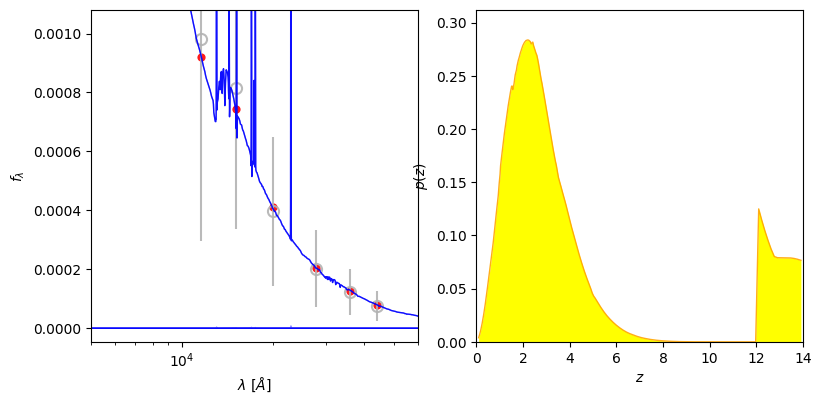

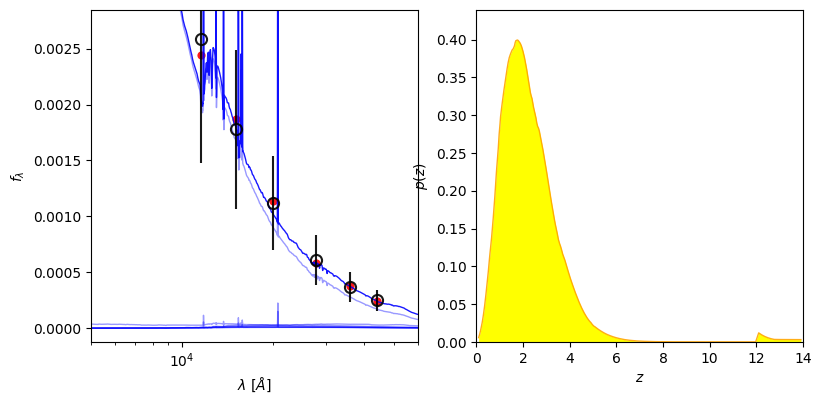

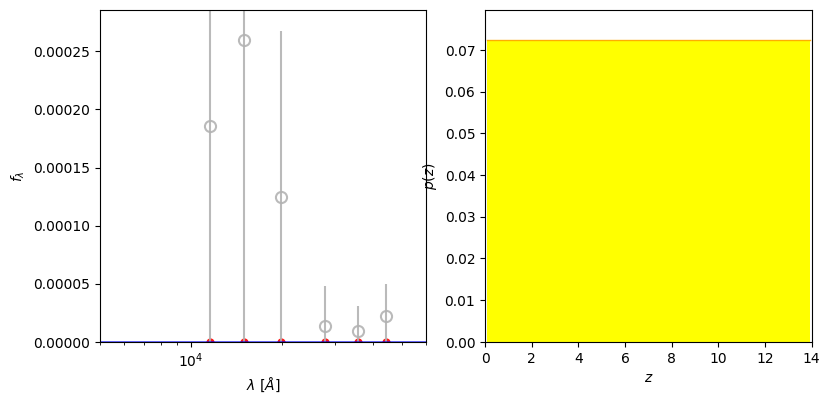

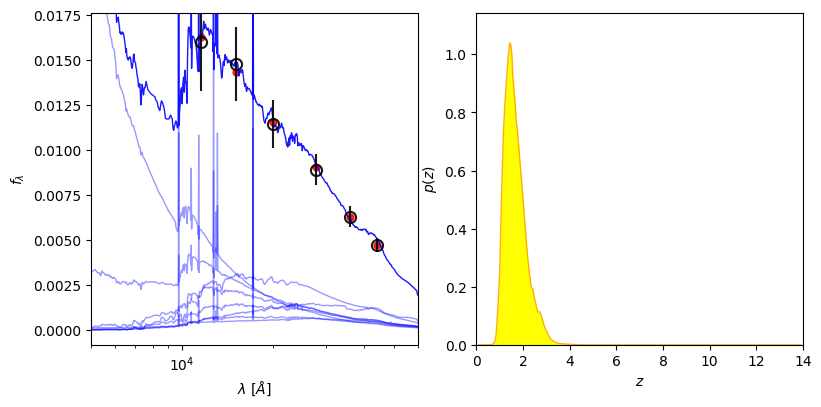

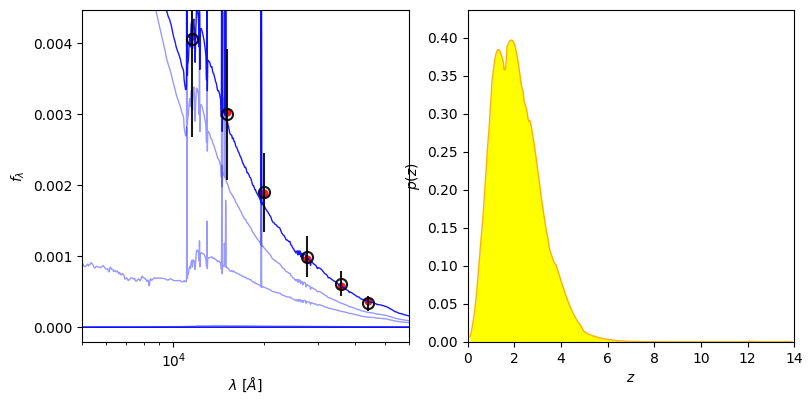

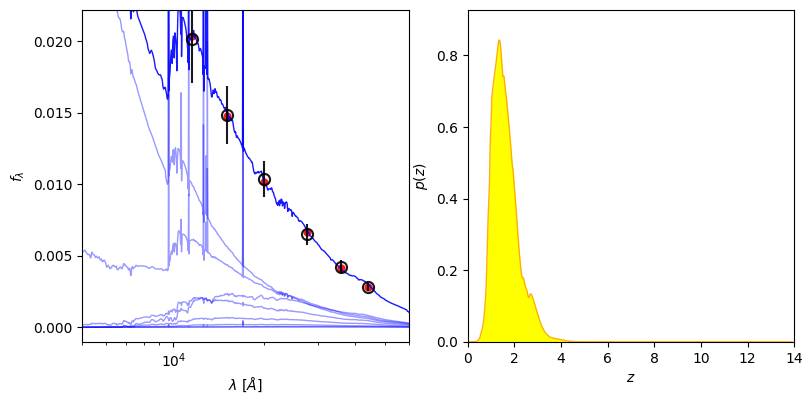

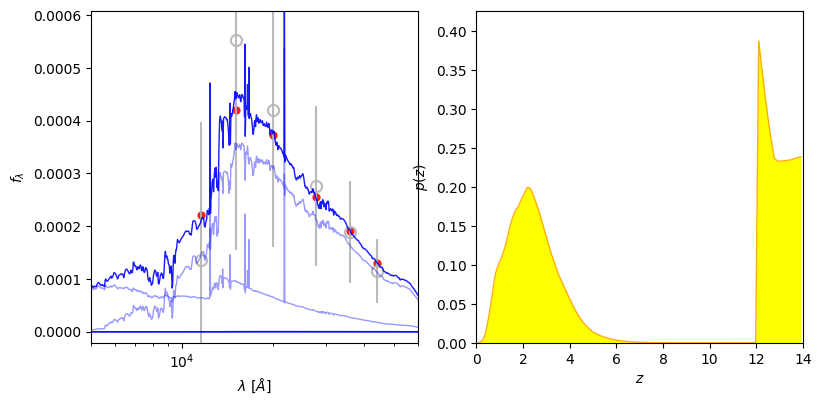

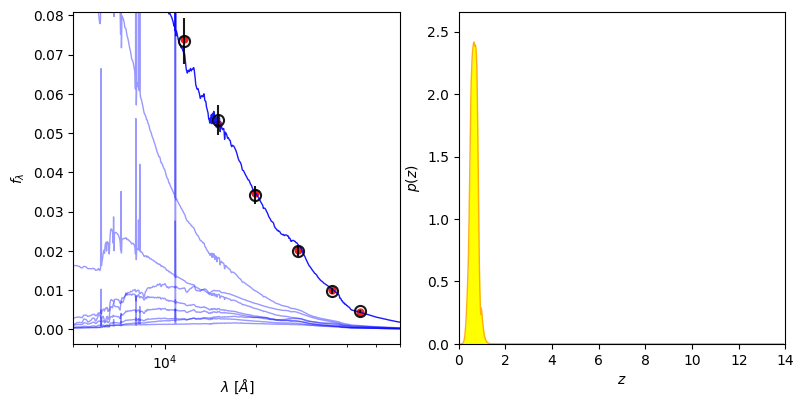

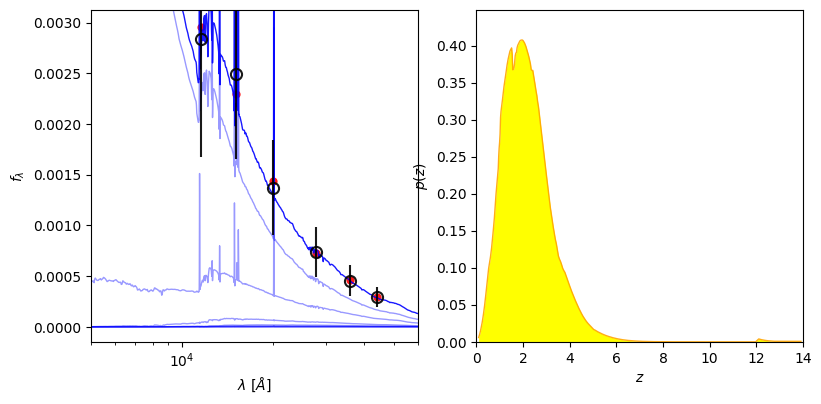

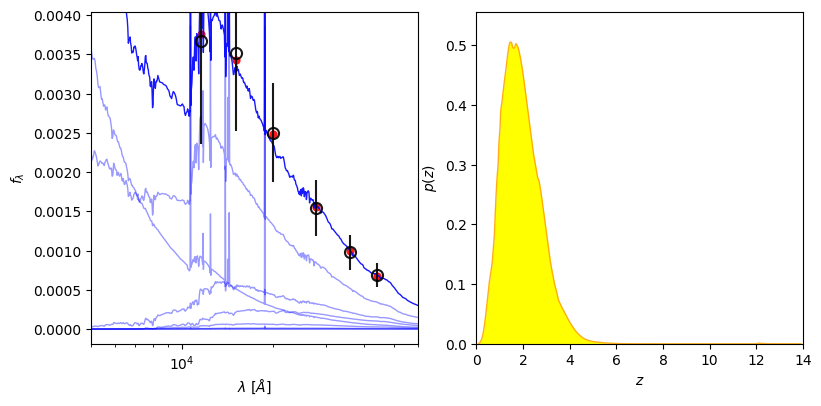

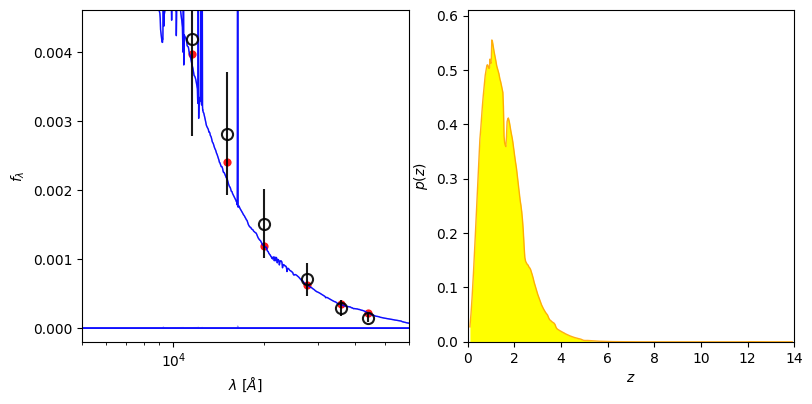

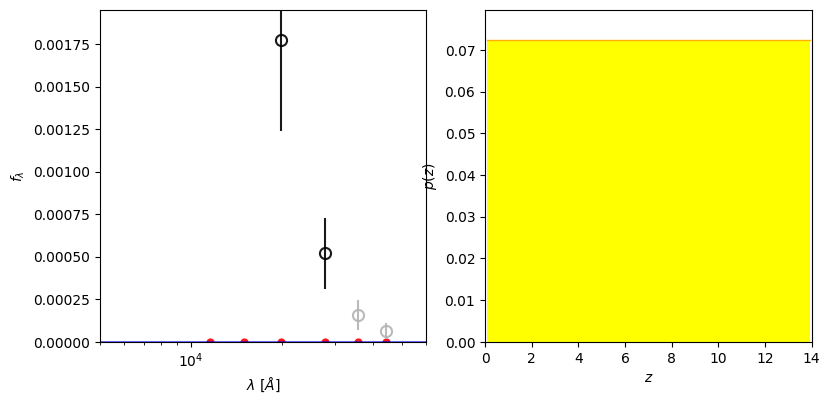

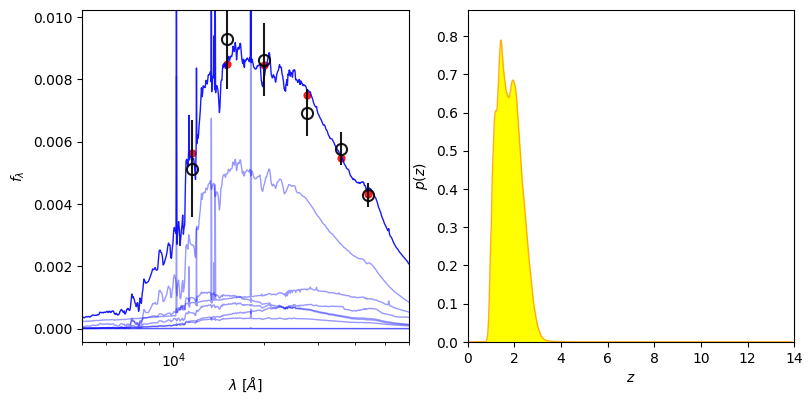

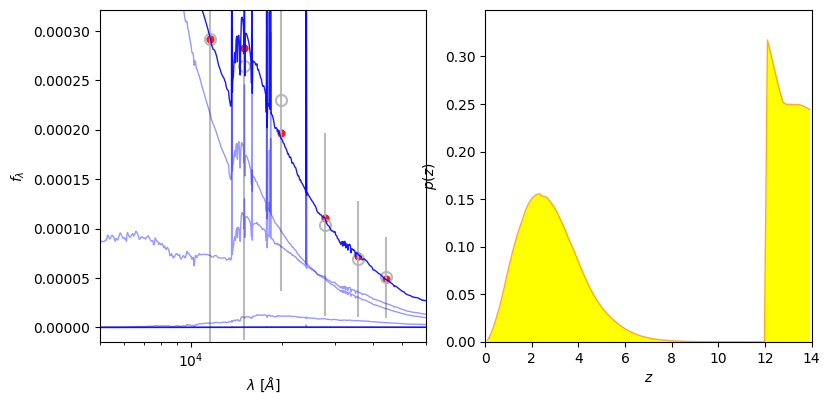

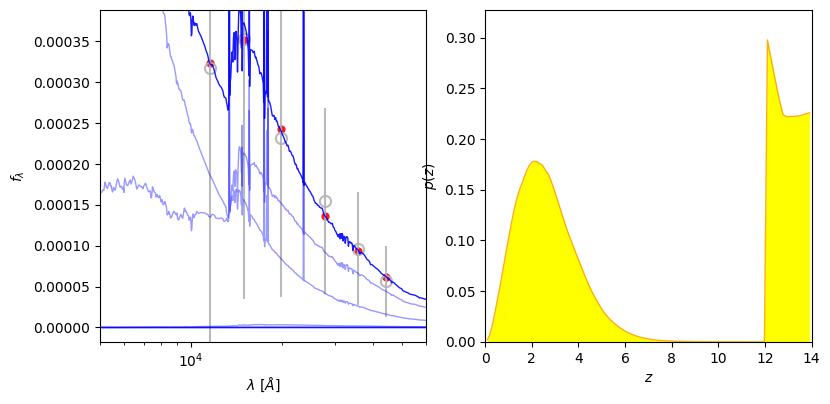

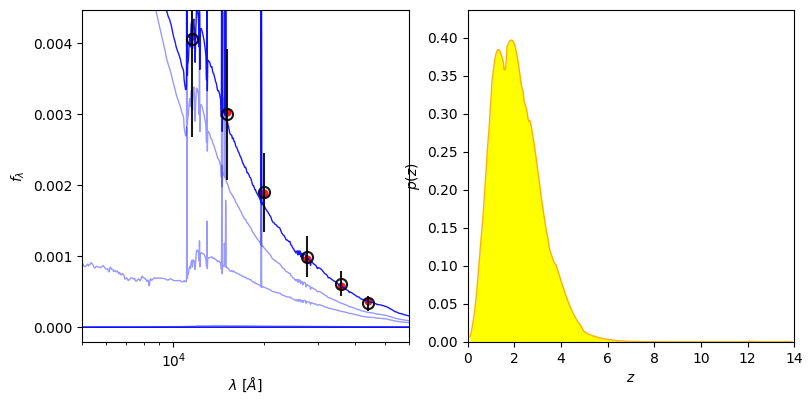

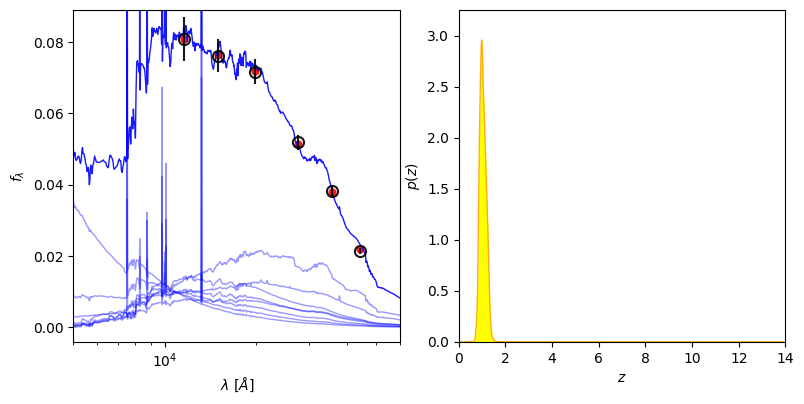

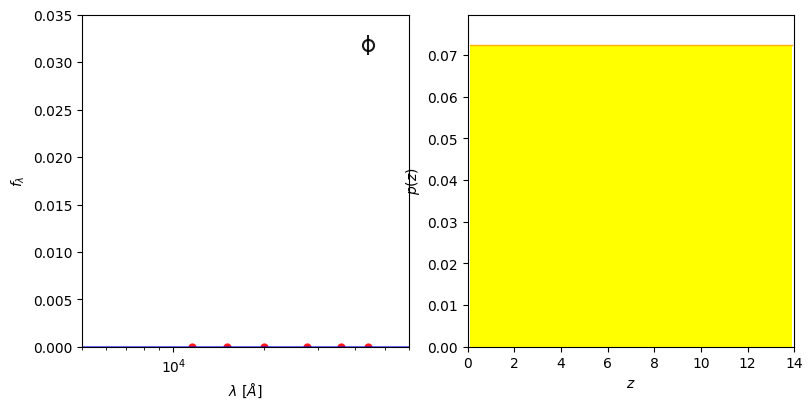

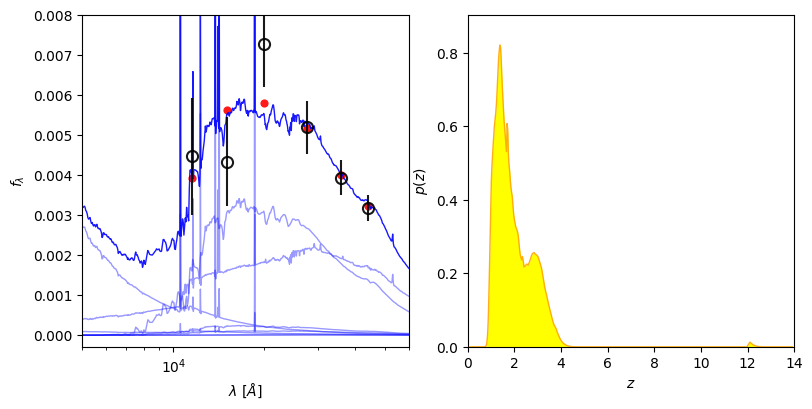

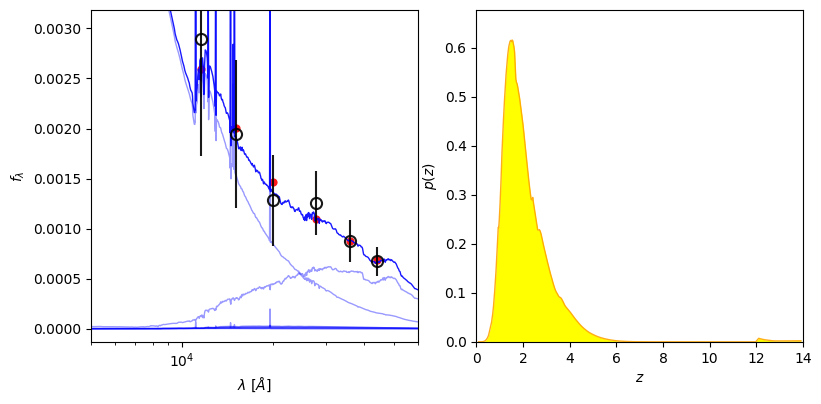

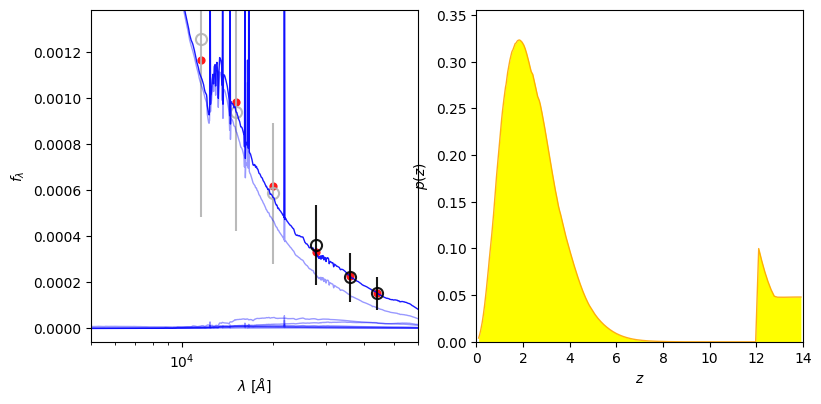

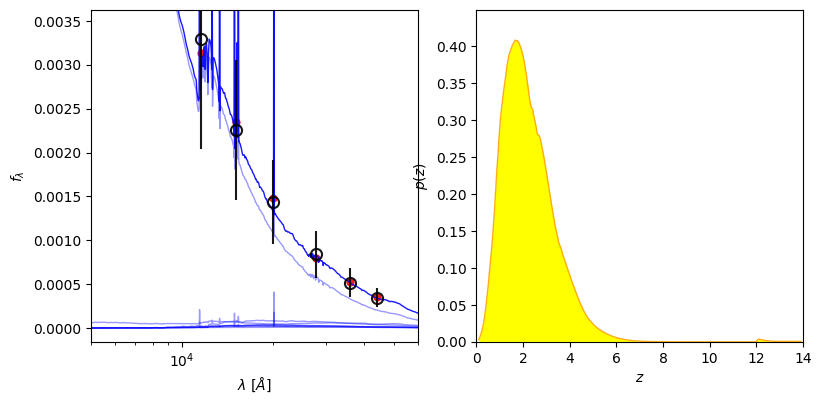

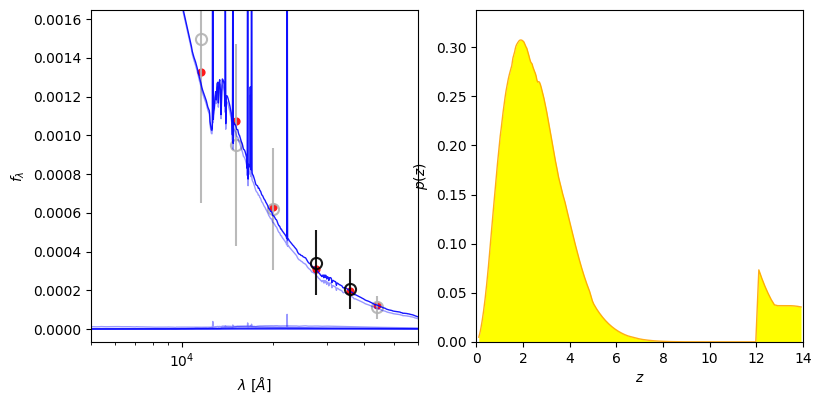

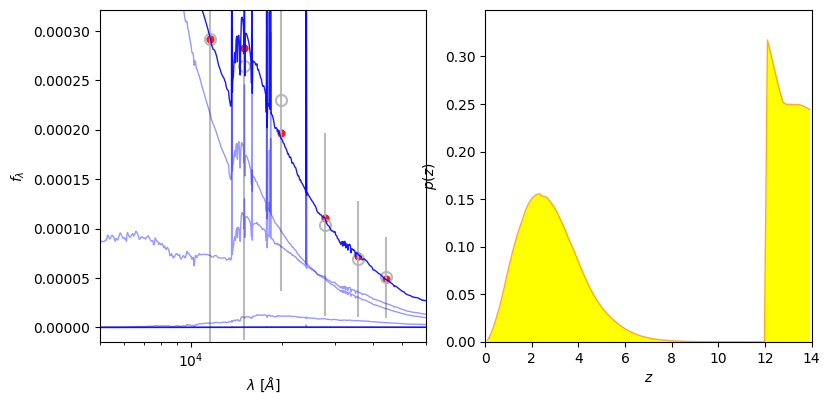

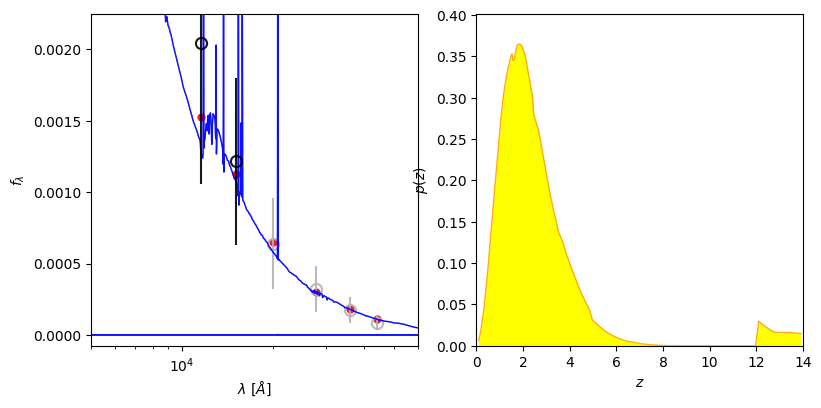

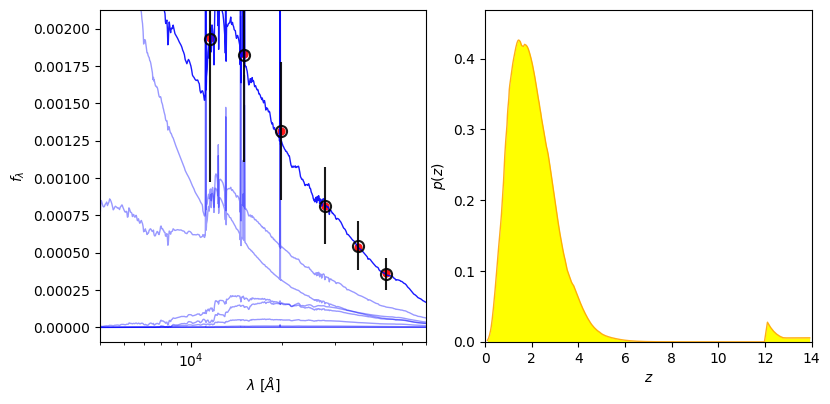

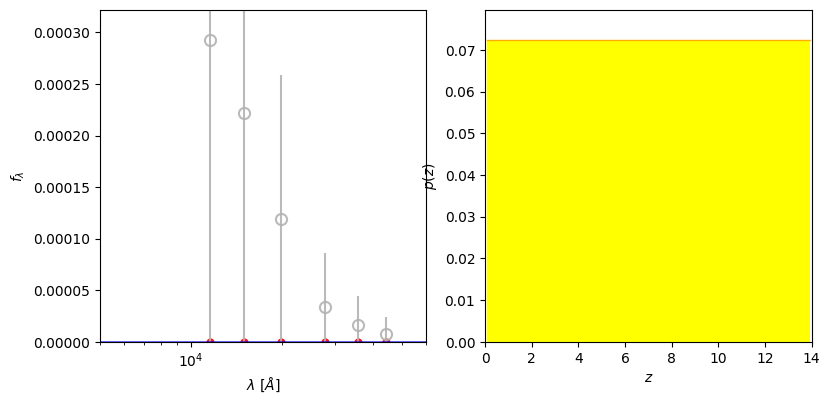

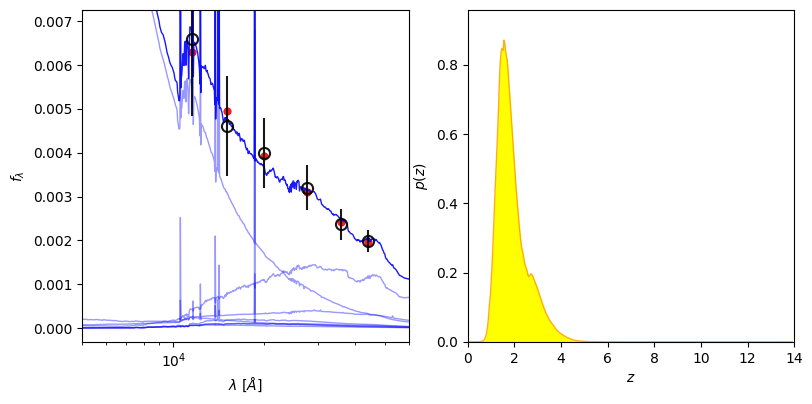

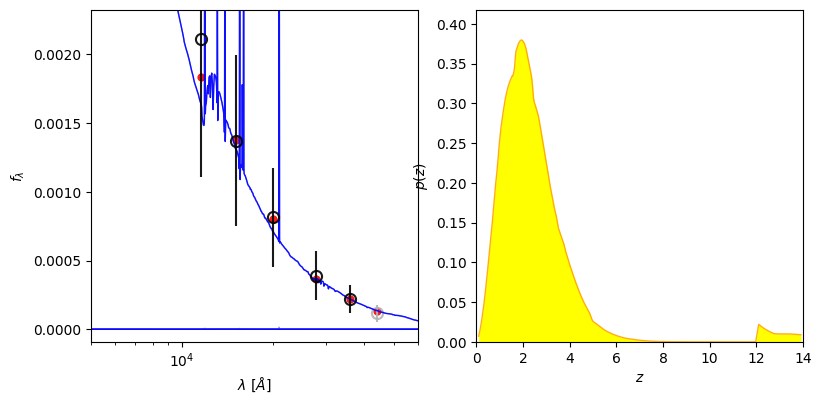

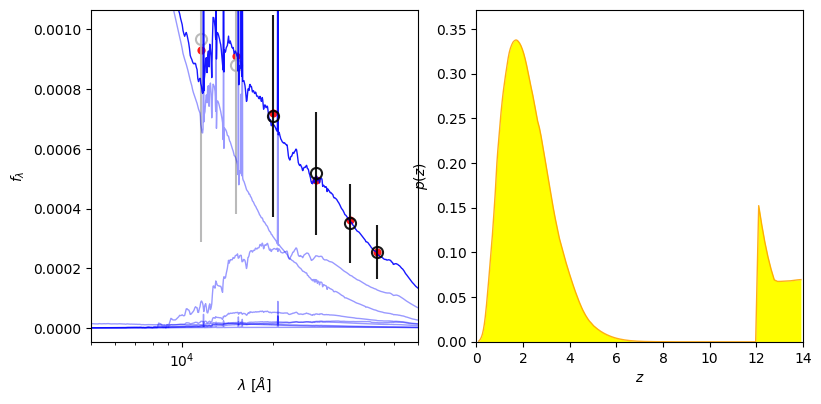

In [4]:
%matplotlib inline

# get number of objects
data = np.loadtxt('ceers_eazy_input_crop1.cat')
nobj = len(data[:,0])

idx = np.random.randint(1,nobj,30)

for ii in idx:
    axes = eazy.plotExampleSED(idx=ii, writePNG=False, MAIN_OUTPUT_FILE='photz1',
                           OUTPUT_DIRECTORY='OUTPUT', CACHE_FILE='Same', lrange=[5000, 6.e4],
                           axes=None, individual_templates=True, fnu=False)

## 3.3. Get measured photometric redshifts

The resulting photometric redshifts are stored in a text file (`photz1.zout`) inside the `OUTPUT` folder. In this output text file, the best-fit redshift is given in 8th column (`z_m2`, i.e., median likelihood redshift). Another important parameter is chi-square (`chi_p` in the output text file) which tells how well the fitting is.

We will retrieve these measured redshifts and merge them with the photometric data that we have made previously into a new catalog.  

In [5]:
data = np.loadtxt('OUTPUT/photz1.zout')

# we will store the redshifts into this array variable
photo_z = data[:,7]

# get the chi-square
chi2 = data[:,6]

Let's make a histogram of redshifts

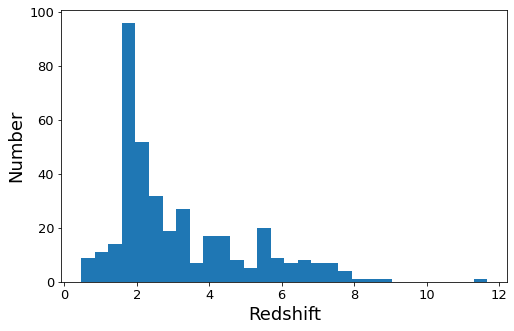

In [6]:
fig1 = plt.figure(figsize=(8,5))
f1 = plt.subplot()
plt.xlabel("Redshift", fontsize=18)
plt.ylabel("Number", fontsize=18)
plt.setp(f1.get_yticklabels(), fontsize=13)
plt.setp(f1.get_xticklabels(), fontsize=13)

plt.hist(photo_z[photo_z>0.0], 30)
plt.show()

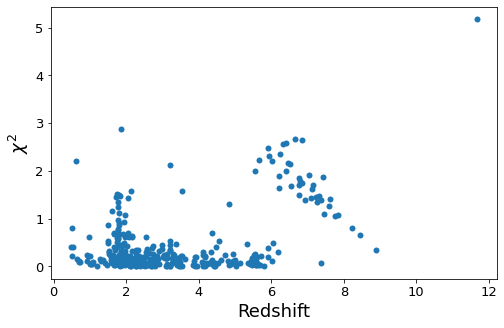

In [7]:
# Plot between photo-z vs. chi-square

fig1 = plt.figure(figsize=(8,5))
f1 = plt.subplot()
plt.xlabel("Redshift", fontsize=18)
plt.ylabel(r"$\chi^{2}$", fontsize=18)
plt.setp(f1.get_yticklabels(), fontsize=13)
plt.setp(f1.get_xticklabels(), fontsize=13)

plt.scatter(photo_z[photo_z>0], chi2[photo_z>0])

## 3.4. Merge with the photometric catalog

We will merge our resulting redshifts into the photometric catalog that we have derived previously. 

In [8]:
# get the photometric catalog
data = np.loadtxt('../ceers_crop1_photo.cat')

# Add two columns for photo-z and chi-square
file_out = open("ceers_crop1_photo_pz.cat","w")
file_out.write("#(1)id (2)x (3)y (4)ra (5)dec (6)f_f115w (7)e_f115w (8)f_f150w (9)e_f150w (10)f_f200w (11)e_f200w (12)f_f277w (13)e_f277w (14)f_f356w (15)e_f356w (16)f_f444w (17)e_f444w (18)photo-z (20)photo-z chi2\n")
file_out.write("# All flux densisties are in units of erg/s/cm^2/Angstrom \n")
for yy in range(0,data.shape[0]):
    file_out.write("%d  " % data[yy][0])
    for xx in range(1,data.shape[1]):
        file_out.write("%e  " % data[yy][xx])
    file_out.write("%lf  %lf\n" % (photo_z[yy],chi2[yy]))
file_out.close()